# Tasks for laboratory assignment 2

In [2]:
# imports section
import numpy as np
import string
import re
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from autocorrect import Speller
import nltk
from wordcloud import WordCloud
import seaborn as sns

import gensim.downloader as api

from gensim.models import Word2Vec

import matplotlib.pyplot as plt
import json

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622364 sha256=e2a834c00647417232ca8ee336ac3aea1a99778ffdbabd4036bd8b5893339058
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## Extract data from the json file

Write a script, that would extract all the the data from the json file and return it in a list of texts for further use in the next tasks

In [ ]:
def extract_texts_from_file(file_path):

    with open(file_path, 'r') as file:
        data = json.load(file)["texts"]

    return data

texts = extract_texts_from_file('/resources/data.json')

## Process the texts

Write a script, that would process these texts. Processing should include:

- Lowercasing
- Removing Punctuation
- Removing Special Characters and Numbers
- Stemming or Lemmatization
- Handling Abbreviations
- Spelling Correction

In [ ]:
def process_texts(texts):

    spell = Speller()
    normalization_dict = {
            "u": "you",
            "ur": "your",
            "r": "are",
            "pls": "please",
            "pos": "please",
            "thx": "thanks"
        }
    def process_text(text: str, speller=spell, abb=normalization_dict):
        text = text.lower()
        text = text.translate(str.maketrans('', '', string.punctuation))
        text = re.sub(r'\d+', '', text)
        text = re.sub(r'[^a-z\s]', '', text)
        text = speller(text)

        words = word_tokenize(text.lower())

        words = [abb.get(word, spell(word)) for word in words]
        lemmatizer = WordNetLemmatizer()
        words = word_tokenize(text)

        lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
        return lemmatized_words
    return list(map(process_text, texts))

texts_processed = process_texts(texts)

## Visualize as cloud of words

Visualize the texts as a cloud of words.

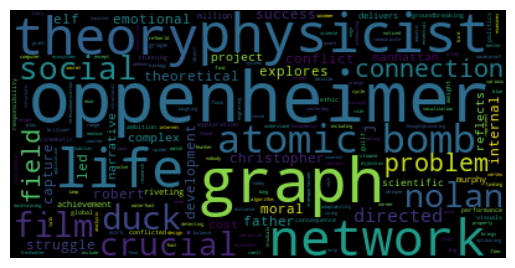

In [ ]:
def visualize_texts(texts_processed):

    text_together = " ".join([word for sentence in texts_processed for word in sentence])

    wc = WordCloud().generate(text_together)

    plt.figure()
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    return None

visualize_texts(texts_processed)

## Calculate cosine similarities using TFIDF

Calculate the TFIDF score and cosine similarity between the texts. You may use gensim, write your own script using numpy or use other module. Output the result as a matrix $n\times n$ of cosine similarity scores (where $n$ is the length of texts list).

**Extra credit**: use word2vec word embeddings in vector spaces to get better TFIDF scores by representing each word as a vector.

In [ ]:
def calcuate_tfidf(texts_processed):

    words = [word for sentence in texts_processed for word in sentence]

    vocab = sorted(set(words))
    vocab_dict = {k:i for i,k in enumerate(vocab)}

    X_tf = np.zeros((len(texts_processed), len(vocab)), dtype=int)
    for i, doc in enumerate(texts_processed):
        for word in doc:
            X_tf[i, vocab_dict[word]] +=1

    idf = np.log(X_tf.shape[0]/X_tf.astype(bool).sum(axis=0))

    X_tfidf = X_tf * idf

    X_tfidf_norm = X_tfidf / np.linalg.norm(X_tfidf, axis = 1)[:,None]
    cosine_similarity = X_tfidf_norm @ X_tfidf_norm.T
    return cosine_similarity

cosine_matrix = calcuate_tfidf(texts_processed)

## Visualize data

Visualize the `cosine_matrix` data using matplotlib. Choose your own method of plotting the scores in a way, that the similarity indeces between texts would be instantly visible. Plot data about texts as well (a couple of first words in the document).

*Hint: remember heat maps, aren't they nice for this task?*

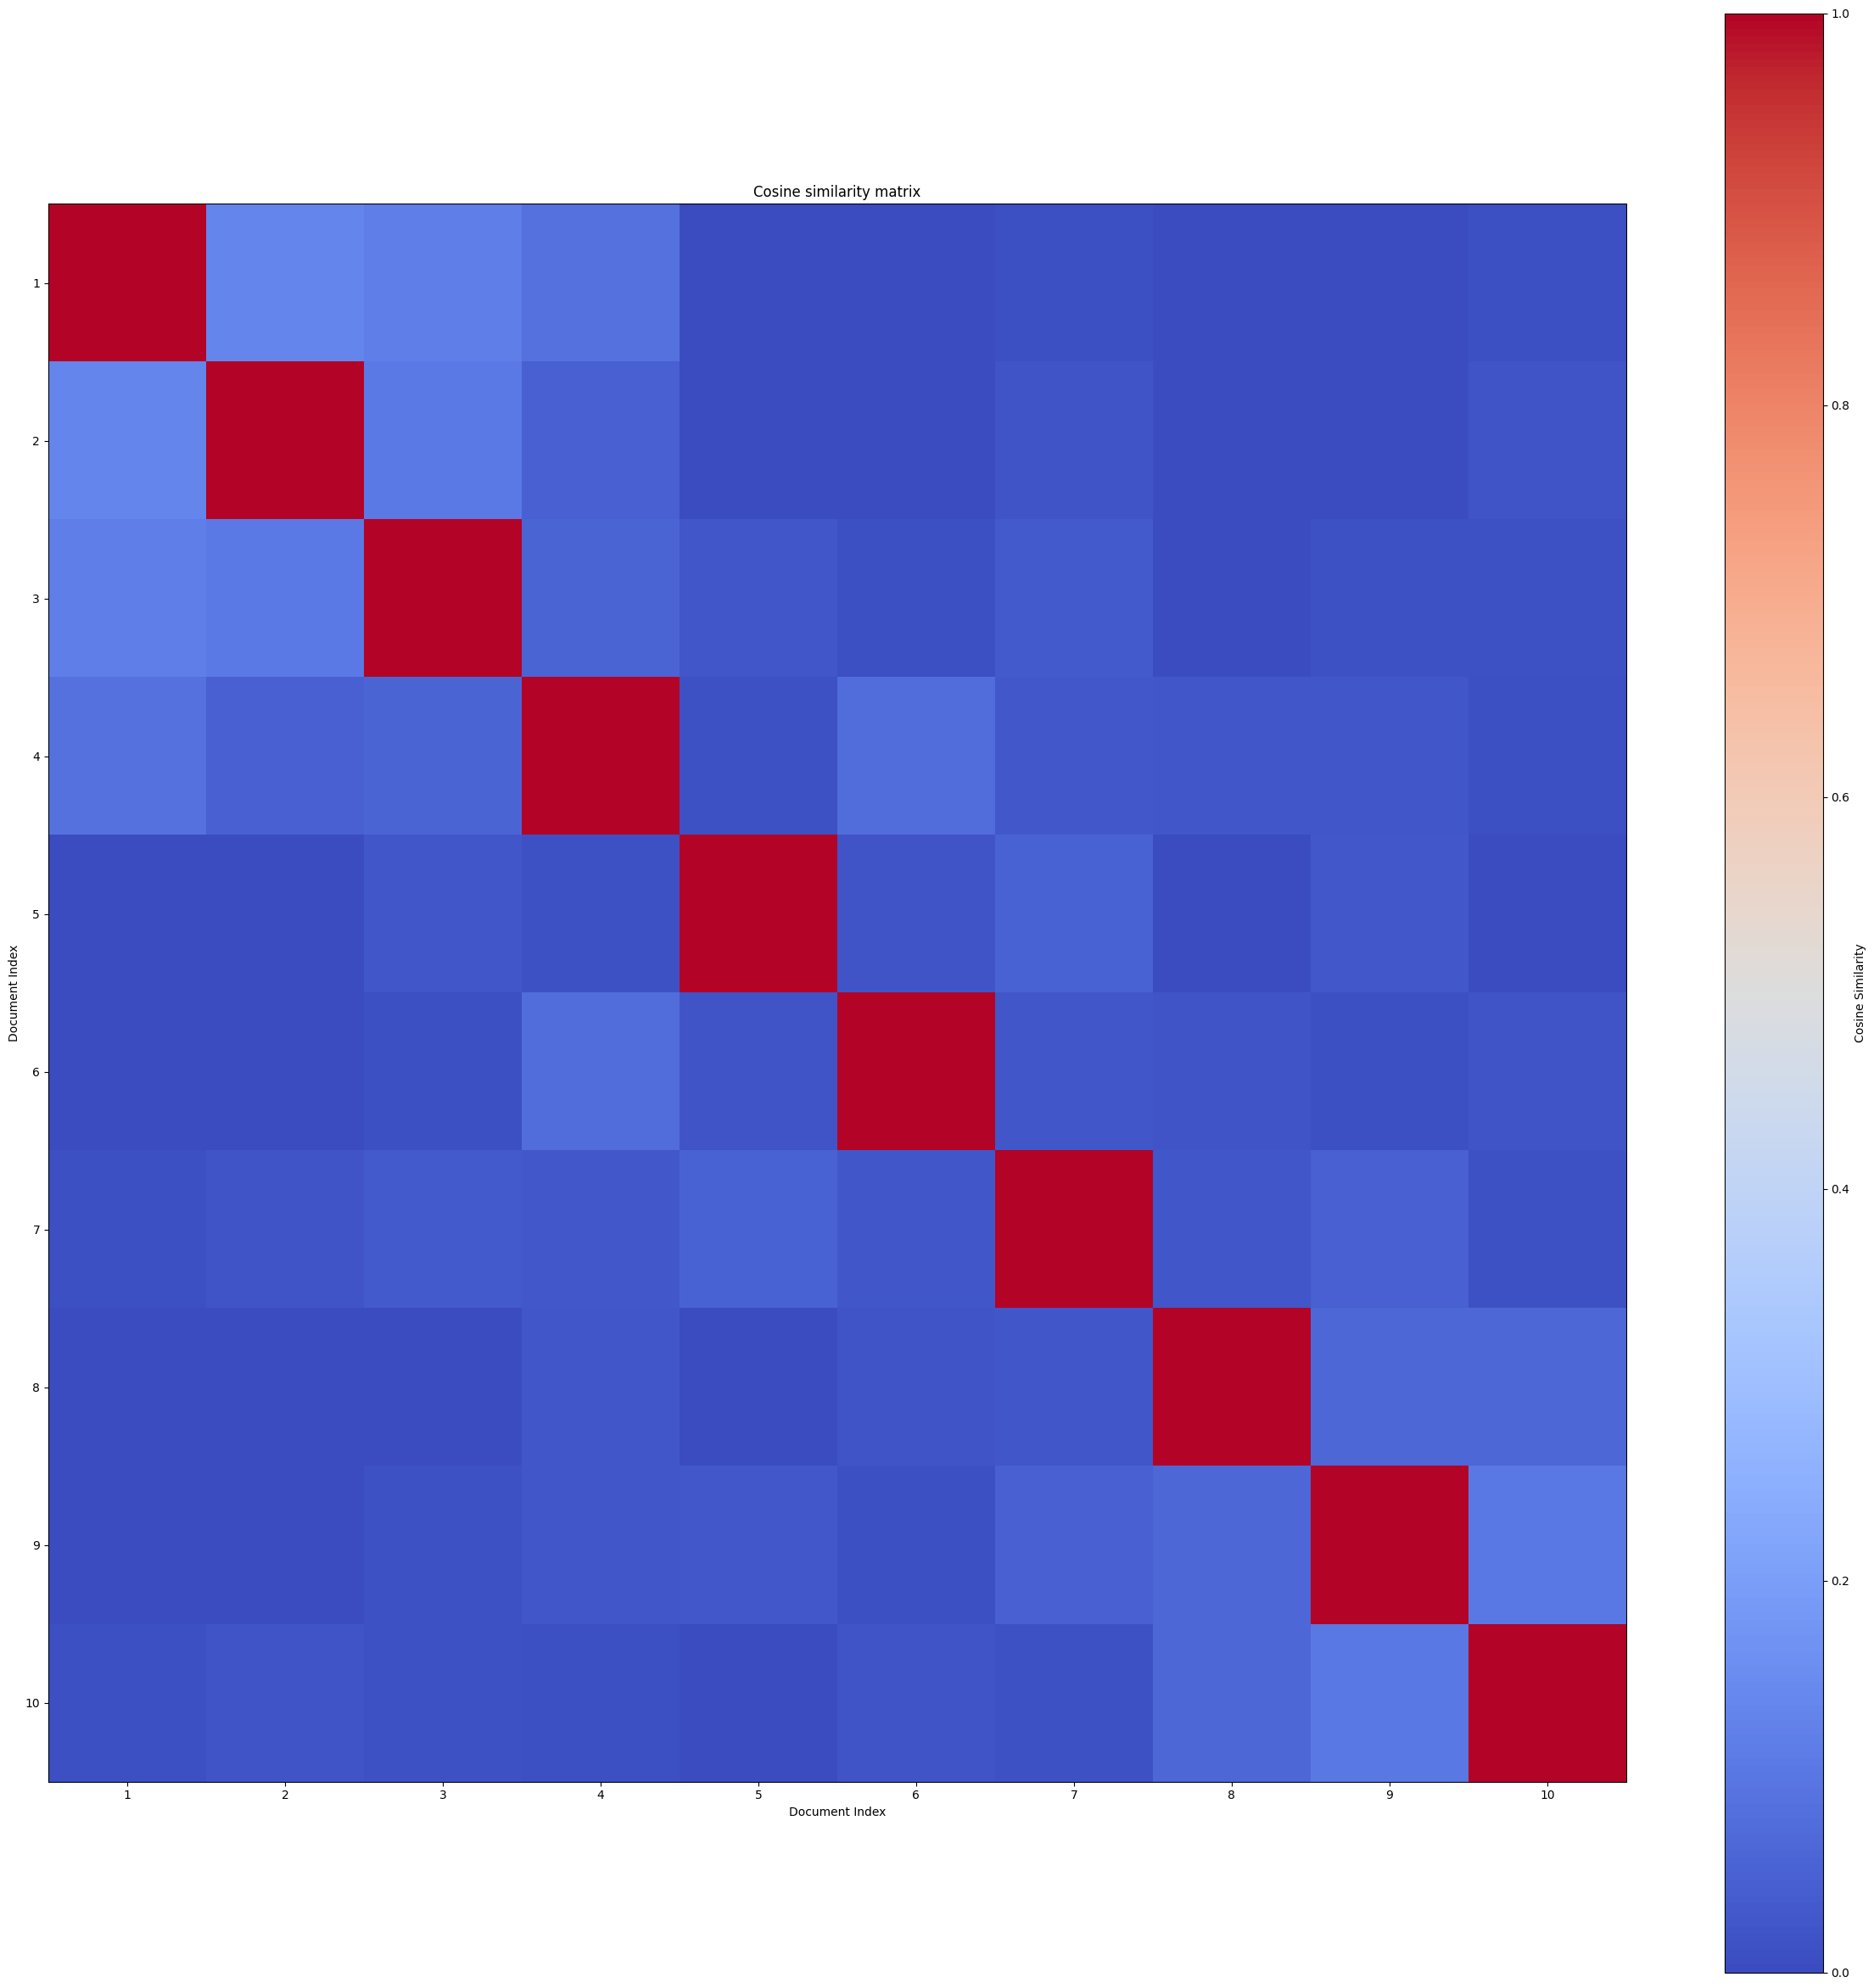

In [ ]:
def visualize_data(cosine_matrix, texts_processed):

    plt.figure(figsize=(30, 30))
    plt.imshow(cosine_matrix, cmap='coolwarm', interpolation='nearest')
    plt.colorbar(label='Cosine Similarity')

    plt.xlabel('Document Index')
    plt.ylabel('Document Index')


    plt.xticks(ticks=np.arange(cosine_matrix.shape[1]), labels=np.arange(1, cosine_matrix.shape[1] + 1))
    plt.yticks(ticks=np.arange(cosine_matrix.shape[0]), labels=np.arange(1, cosine_matrix.shape[0] + 1))

    plt.title('Cosine similarity matrix')

    return None

visualize_data(cosine_matrix, texts_processed)